In [2]:
import xarray as xr

In [3]:
ds = xr.tutorial.load_dataset('air_temperature')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [19]:
nyc = ds.sel(lat=40.712, lon = 74.0060, method='nearest')
la = ds.sel(lat = 34.0522, lon =118.2437, method='nearest'  )

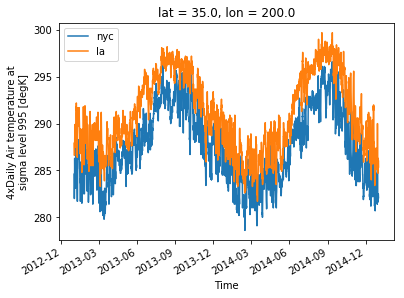

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

_ = nyc['air'].plot(label='nyc')
_ = la['air'].plot(label='la')
_ = plt.legend()

(array([  62.,  287.,  553.,  434.,  399.,  562.,  629.,  572., 1142.,
         660.]),
 array([227.  , 234.59, 242.18, 249.77, 257.36, 264.95, 272.54, 280.13,
        287.72, 295.31, 302.9 ], dtype=float32),
 <a list of 10 Patch objects>)

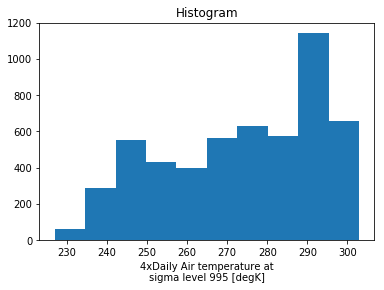

In [22]:
winter = ds['air'].sel(time='2013-01-01')
winter.plot()

In [34]:
climnyc = nyc.groupby('time.month').mean('time')
climla = la.groupby('time.month').mean('time')

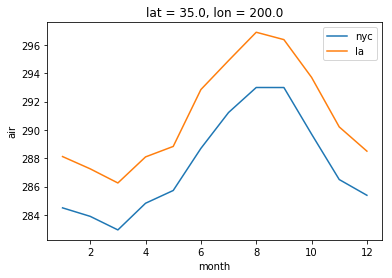

In [40]:
_ = climnyc['air'].plot(label='nyc')
_ = climla['air'].plot(label='la')
_ = plt.legend()